#### Central dogma
$\frac{\ dm}{\ dt} = k_m - \gamma_m m$ \
\
$\frac{\ dp}{\ dt} = k_p m - \gamma_p p$\
\
**where**, \
$\frac{\ dm}{\ dt}$ - rate of change of mRNA \
$\frac{\ dp}{\ dt}$ - rate of change of protein \
$k_m$ - rate of synthesis of mRNA \
$k_p$ - rate of synthesis of protein \
$\gamma_m$ - rate of degradation of mRNA \
$\gamma_p$ - rate of degradation of protein \
$m$ - concentration of mRNA \
$p$ - concentration of protein


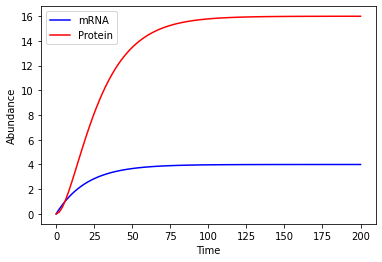

In [15]:
import numpy as np
import matplotlib.pyplot 
matplotlib.use('tkagg')
import matplotlib.pyplot as plt
from scipy.integrate import odeint

y0 = [0,0] #0 mRNA, 0 protein

t = np.linspace(0,200,num=100)

k_m = 0.2
gamma_m = 0.05

k_p = 0.4
gamma_p = 0.1

par = [k_m, gamma_m, k_p, gamma_p] # parameters for ODE solver

def sim(vars, t, par):
    m = vars[0]
    p = vars[1]

    k_m = par[0]
    gamma_m = par[1]
    k_p = par[2]
    gamma_p = par[3]

    dmdt = k_m - gamma_m*m
    dpdt = k_p*m - gamma_p*p

    return([dmdt, dpdt])

y = odeint(sim, y0, t, args = (par,))

f,graph = plt.subplots(1)

mrna, = graph.plot(t, y[:, 0], 'b', label="mRNA")
prot, = graph.plot(t, y[:, 1], 'r', label="Protein")

graph.set_xlabel('Time')
graph.set_ylabel('Abundance')

graph.legend(handles=[mrna,prot])

plt.show()